In [2]:
# Import necessary libraries
import pandas as pd
import glob
import warnings
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Filter out SettingWithCopyWarning
warnings.filterwarnings("ignore", category=Warning)


merged_df = pd.read_csv('AQI_FINAL.csv')
merged_df


,STATE_CODE,COUNTY_CODE,AQS_SITE_ID,SITE_LATITUDE,SITE_LONGITUDE,Date,STATE,COUNTY,CITY,CO_DAILY_AQI_VALUE,NO2_DAILY_AQI_VALUE,OZONE_DAILY_AQI_VALUE,PM2.5_DAILY_AQI_VALUE,SO2_DAILY_AQI_VALUE
0,1,73,23,33.553056,-86.815000,01-01-2012,Alabama,Jefferson,Birmingham,5,19,30,30,6
1,42,11,11,40.383350,-75.968600,01-01-2012,Pennsylvania,Berks,Not in a city,0,9,24,35,0
2,42,3,8,40.465420,-79.960757,01-01-2012,Pennsylvania,Allegheny,Pittsburgh,5,8,27,22,4
3,41,51,80,45.496641,-122.602877,01-01-2012,Oregon,Multnomah,Portland,2,4,23,10,1
4,40,143,1127,36.204902,-95.976537,01-01-2012,Oklahoma,Tulsa,Tulsa,2,5,29,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322733,22,33,9,30.461981,-91.179219,10-01-2023,Louisiana,East Baton Rouge,Baton Rouge,1,18,34,35,2
322734,51,650,8,37.103733,-76.387017,10-01-2023,Virginia,Hampton City,Hampton,2,7,41,27,2
322735,51,87,14,37.556520,-77.400270,10-01-2023,Virginia,Henrico,East Highland Park,3,14,36,31,0
322736,49,35,3010,40.784220,-111.931000,10-01-2023,Utah,Salt Lake,Salt Lake City,0,26,45,31,1


In [3]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322738 entries, 0 to 322737
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   STATE_CODE             322738 non-null  int64  
 1   COUNTY_CODE            322738 non-null  int64  
 2   AQS_SITE_ID            322738 non-null  int64  
 3   SITE_LATITUDE          322738 non-null  float64
 4   SITE_LONGITUDE         322738 non-null  float64
 5   Date                   322738 non-null  object 
 6   STATE                  322738 non-null  object 
 7   COUNTY                 322738 non-null  object 
 8   CITY                   322738 non-null  object 
 9   CO_DAILY_AQI_VALUE     322738 non-null  int64  
 10  NO2_DAILY_AQI_VALUE    322738 non-null  int64  
 11  OZONE_DAILY_AQI_VALUE  322738 non-null  int64  
 12  PM2.5_DAILY_AQI_VALUE  322738 non-null  int64  
 13  SO2_DAILY_AQI_VALUE    322738 non-null  int64  
dtypes: float64(2), int64(8), object(4)
m

In [4]:
merged_df

,STATE_CODE,COUNTY_CODE,AQS_SITE_ID,SITE_LATITUDE,SITE_LONGITUDE,Date,STATE,COUNTY,CITY,CO_DAILY_AQI_VALUE,NO2_DAILY_AQI_VALUE,OZONE_DAILY_AQI_VALUE,PM2.5_DAILY_AQI_VALUE,SO2_DAILY_AQI_VALUE
0,1,73,23,33.553056,-86.815000,01-01-2012,Alabama,Jefferson,Birmingham,5,19,30,30,6
1,42,11,11,40.383350,-75.968600,01-01-2012,Pennsylvania,Berks,Not in a city,0,9,24,35,0
2,42,3,8,40.465420,-79.960757,01-01-2012,Pennsylvania,Allegheny,Pittsburgh,5,8,27,22,4
3,41,51,80,45.496641,-122.602877,01-01-2012,Oregon,Multnomah,Portland,2,4,23,10,1
4,40,143,1127,36.204902,-95.976537,01-01-2012,Oklahoma,Tulsa,Tulsa,2,5,29,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322733,22,33,9,30.461981,-91.179219,10-01-2023,Louisiana,East Baton Rouge,Baton Rouge,1,18,34,35,2
322734,51,650,8,37.103733,-76.387017,10-01-2023,Virginia,Hampton City,Hampton,2,7,41,27,2
322735,51,87,14,37.556520,-77.400270,10-01-2023,Virginia,Henrico,East Highland Park,3,14,36,31,0
322736,49,35,3010,40.784220,-111.931000,10-01-2023,Utah,Salt Lake,Salt Lake City,0,26,45,31,1


In [5]:

# Assuming 'model1' is your DataFrame containing the data
model1 = merged_df[['Date', 'CO_DAILY_AQI_VALUE']]

# Convert 'Date' column to datetime
model1['Date'] = pd.to_datetime(model1['Date'])

# Extract year and month from the 'Date' column
model1['Year'] = model1['Date'].dt.year
model1['Month'] = model1['Date'].dt.month

# Group by 'Year' and 'Month', calculate the mean of 'DAILY_AQI_VALUE_OZONE'
monthly_avg = model1.groupby(['Year', 'Month']).agg({'CO_DAILY_AQI_VALUE': 'mean'}).reset_index()

# Create a new 'Date' column based on 'Year' and 'Month'
monthly_avg['Date'] = pd.to_datetime(monthly_avg[['Year', 'Month']].assign(DAY=1))

# Reorder columns to have 'Date' as the first column
monthly_avg = monthly_avg[['Date', 'Year', 'Month', 'CO_DAILY_AQI_VALUE']]

# Display the DataFrame
print(monthly_avg)


          Date  Year  Month  CO_DAILY_AQI_VALUE
0   2012-01-01  2012      1            6.507736
1   2012-02-01  2012      2            5.466040
2   2012-03-01  2012      3            4.335337
3   2012-04-01  2012      4            3.724573
4   2012-05-01  2012      5            3.295133
..         ...   ...    ...                 ...
137 2023-06-01  2023      6            3.202105
138 2023-07-01  2023      7            3.254432
139 2023-08-01  2023      8            3.068441
140 2023-09-01  2023      9            3.100000
141 2023-10-01  2023     10            2.583333

[142 rows x 4 columns]


Building ARIMA model for CO_DAILY_AQI_VALUE


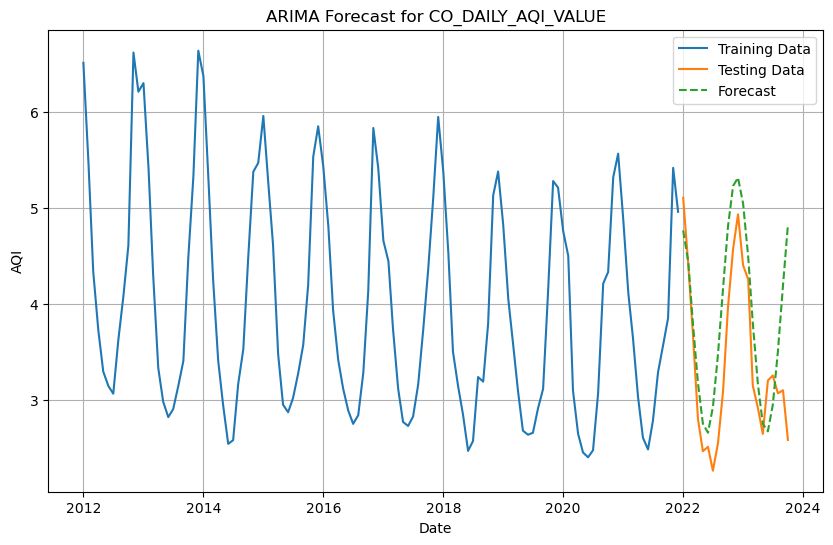

MAE for CO_DAILY_AQI_VALUE: 0.55906204627147
MSE for CO_DAILY_AQI_VALUE: 0.5375431597266241
RMSE for CO_DAILY_AQI_VALUE: 0.733173349029153
Building ARIMA model for NO2_DAILY_AQI_VALUE


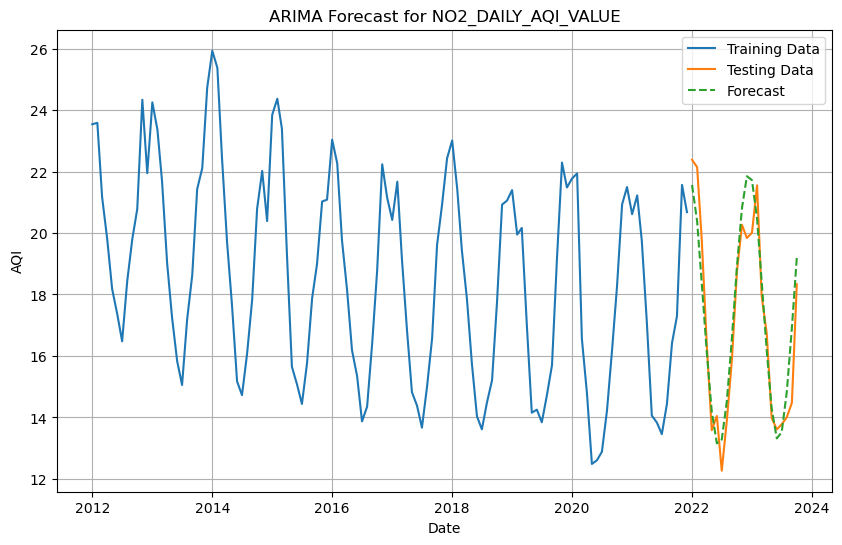

MAE for NO2_DAILY_AQI_VALUE: 0.8915192902537885
MSE for NO2_DAILY_AQI_VALUE: 1.1618836395501524
RMSE for NO2_DAILY_AQI_VALUE: 1.0779070644309519
Building ARIMA model for PM2.5_DAILY_AQI_VALUE


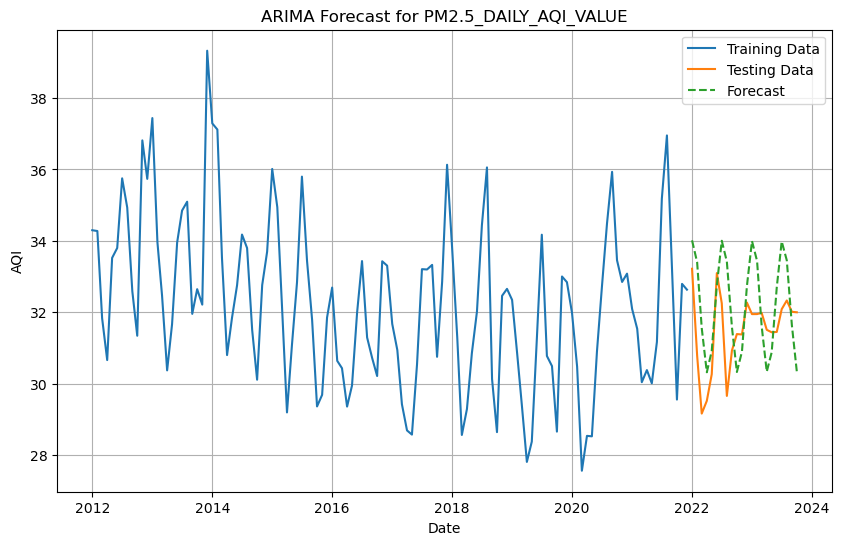

MAE for PM2.5_DAILY_AQI_VALUE: 1.2594015707195478
MSE for PM2.5_DAILY_AQI_VALUE: 2.324185889425948
RMSE for PM2.5_DAILY_AQI_VALUE: 1.5245280874506537
Building ARIMA model for OZONE_DAILY_AQI_VALUE


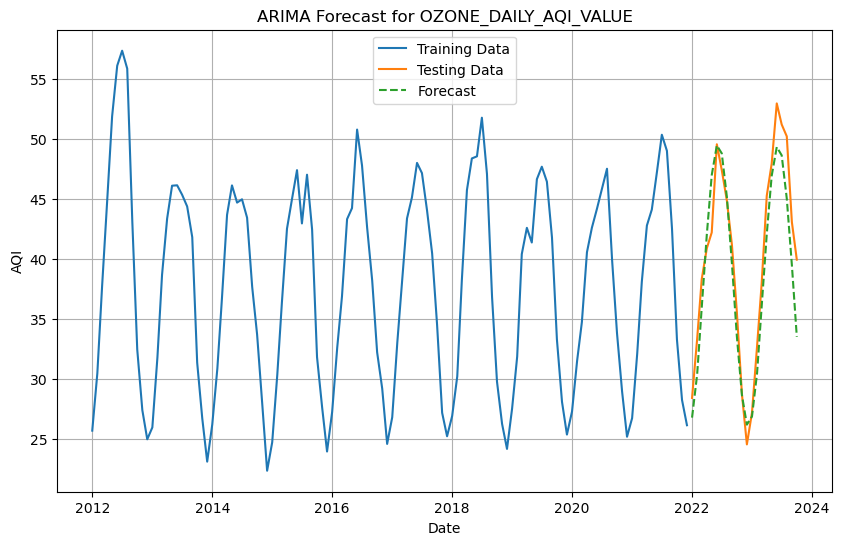

MAE for OZONE_DAILY_AQI_VALUE: 2.278166201921918
MSE for OZONE_DAILY_AQI_VALUE: 7.886810389779033
RMSE for OZONE_DAILY_AQI_VALUE: 2.808346557990846
Average MAE across all pollutants: 1.2470372772916811
Average MSE across all pollutants: 2.9776057696204394
Average RMSE across all pollutants: 1.5359887647254014


In [12]:

# Iterate over each pollutant column
for column in ['CO_DAILY_AQI_VALUE', 'NO2_DAILY_AQI_VALUE', 'PM2.5_DAILY_AQI_VALUE',
               'OZONE_DAILY_AQI_VALUE']:
    print(f"Building ARIMA model for {column}")
    
    # Assuming 'merged_df' is your DataFrame containing the data
    model_data = merged_df[['Date', column]]

    # Convert 'Date' column to datetime
    model_data['Date'] = pd.to_datetime(model_data['Date'])

    # Extract year and month from the 'Date' column
    model_data['Year'] = model_data['Date'].dt.year
    model_data['Month'] = model_data['Date'].dt.month

    # Group by 'Year' and 'Month', calculate the mean of the pollutant column
    monthly_avg = model_data.groupby(['Year', 'Month']).agg({column: 'mean'}).reset_index()

    # Create a new 'Date' column based on 'Year' and 'Month'
    monthly_avg['Date'] = pd.to_datetime(monthly_avg[['Year', 'Month']].assign(DAY=1))

    # Reorder columns to have 'Date' as the first column
    monthly_avg = monthly_avg[['Date', 'Year', 'Month', column]]

    # Extract the data for training (2010-2014) and testing (2015)
    train_data = monthly_avg[(monthly_avg['Year'] >= 2012) & (monthly_avg['Year'] <= 2021)]
    test_data = monthly_avg[(monthly_avg['Year'] > 2021) & (monthly_avg['Year'] <= 2023)]

    # Set the 'Date' column as index
    train_data.set_index('Date', inplace=True)
    test_data.set_index('Date', inplace=True)

    # Fit ARIMA model using the training data
    model = ARIMA(train_data[column], order=(3, 0, 3))  # Example ARIMA order
    fit_model = model.fit()

    # Forecast future values for the testing period
    forecast_steps = len(test_data)
    forecast = fit_model.forecast(steps=forecast_steps)

    # Plot actual and predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data[column], label='Training Data')
    plt.plot(test_data.index, test_data[column], label='Testing Data')
    plt.plot(test_data.index, forecast, label='Forecast', linestyle='--')
    plt.title(f'ARIMA Forecast for {column}')
    plt.xlabel('Date')
    plt.ylabel('AQI')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    


In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize lists to store accuracy metrics for each pollutant
mae_list = []
mse_list = []

# Iterate over each pollutant column
for column in ['CO_DAILY_AQI_VALUE', 'NO2_DAILY_AQI_VALUE', 'PM2.5_DAILY_AQI_VALUE', 'OZONE_DAILY_AQI_VALUE']:
    
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(test_data[column], forecast)
    mae_list.append(mae)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(test_data[column], forecast)
    mse_list.append(mse)

    # Print MAE and MSE for the current pollutant
    print(f"MAE for {column}: {mae}")
    print(f"MSE for {column}: {mse}")

# Calculate average MAE and MSE across all pollutants
avg_mae = np.mean(mae_list)
avg_mse = np.mean(mse_list)

print(f"Average MAE across all pollutants: {avg_mae}")
print(f"Average MSE across all pollutants: {avg_mse}")


KeyError: 'CO_DAILY_AQI_VALUE'

### 1. Ozone (O3)
Preventive Measures:
Reducing VOCs and NOx Emissions: Since ozone is formed by the reaction of VOCs and NOx in the presence of sunlight, controlling emissions from industrial processes and vehicles can significantly lower ozone levels.
Traffic Management: Implement dynamic traffic control measures during high ozone days, such as promoting public transportation and carpooling.
Policy Interventions:
Emission Control Legislation: Strengthen regulations on industrial emissions and encourage the use of cleaner technologies.
Public Health Advisories: Issue ozone alerts on days with predicted high ozone levels to minimize outdoor activities, especially for vulnerable populations like children and the elderly.
### 2. Nitrogen Dioxide (NO2)
Preventive Measures:
Upgrade Public Transportation: Enhance the quality and reach of public transport systems to reduce reliance on private vehicles, thus lowering NOx emissions.
Promote Green Energy: Encourage the adoption of renewable energy sources in industrial and residential areas to cut down on fossil fuel combustion.
Policy Interventions:
Vehicle Emission Standards: Implement stricter vehicle emission standards and periodic checks to ensure compliance.
Urban Planning: Develop green belts and zones in urban areas to help absorb NO2 and other pollutants.
### 3. Particulate Matter (PM2.5 and PM10)
Preventive Measures:
Industrial Dust Control: Apply dust control measures such as fabric filters or electrostatic precipitators in industries known to emit particulate matter.
Road Dust Management: Regularly clean streets and enforce regulations to control construction dust.
Policy Interventions:
Air Quality Monitoring: Expand air quality monitoring stations to provide more comprehensive coverage and real-time data for effective management.
Health Initiatives: Launch health initiatives that focus on reducing exposure to particulate matter, particularly in areas with high asthma rates.
### 4. Sulfur Dioxide (SO2)
Preventive Measures:
Cleaner Fuel Use: Promote the use of low-sulfur fuels in industries and power plants.
Technological Upgrades: Encourage the adoption of flue-gas desulfurization units in plants that burn sulfur-containing fuels.
Policy Interventions:
Industrial Compliance: Tighten compliance requirements for industries regarding SO2 emissions.
Public Awareness Campaigns: Educate the public about the sources and impacts of SO2, promoting community involvement in monitoring and reporting pollution.
### 5. Carbon Monoxide (CO)
Preventive Measures:
Vehicle Maintenance: Advocate for regular vehicle maintenance to improve engine efficiency and reduce CO emissions.
Indoor Air Quality Management: Install CO detectors in homes and workplaces, particularly in areas using combustion-based heating systems.
Policy Interventions:
Urban Wood Smoke Reduction: Implement programs to reduce wood smoke in residential areas through the promotion of cleaner heating technologies.
Regulatory Enforcement: Ensure that industries using combustion processes adhere strictly to air quality standards for CO.